This tutorial gives an introduction about how to model link-entity data, and lists some applications, such as recommender systems, with a simple demo on how to realize it.

# What is Link-Entity Data?
**Entity** is a real object with an independent existence. For example, a student, car, and gene can all be an entity as itself. A **link** means an edge between two entities (or nodes), reflecting an interation between these. Hence, link-entity data, which we usually call as the social network, is a collection of entities that are interconnected. 

Links can be **directed**. In a graph of instagram likes, one can only like someone else's graph without getting any feedback on this action. Links can also be **undirected**. For example, the existence of a specific path between two destinations has no directionality. In addition, we can also add **weights** to the links to show the strength of the tie between entities. For instance, if A likes 20 of B's posted photos, we may predict that A appericiates B much more compared to C who only likes one of B's posts.

<figure>
<img src="FIG1.png" alt="FIG1.png" style="width: 210px;"/>
<figcaption style="text-align: center">*Figure 1* A Simple Graph of Link-Entity Data</figcaption>
</figure>

# Basic Concepts and Properties about Graph

A lot of datasets can be represented as graph with large scales. 

**Social networks** can be a typical application of link-entity data, consisting of links which dentote a social interaction, such as friendship networks of facebook. Another common area would be **biological networks**, such as metabolic pathways and Neural Networks. 
<figure>
<img src="FIG2.png" alt="FIG2.png" style="width: 350px;"/>
<figcaption style="text-align: center">*Figure 2* A Typical Neural Network with Two Labels</figcaption>
</figure>

**Diameter** is a property to describe the longest of the shortest paths between any pair of nodes. **Degree** is the number of edges incident to the node. In a real-world graph, it typically contains non-trivial subsets of nodes with high degrees (many connections), following a power law distribution pattern, even if the network is extremely sparse. Meanwhile, the famous small world experiment held by Stanley Milgram in 1967 implies that it is available to reach a node with high degree in a small number of steps, i.e. small diameter, and therefrom to reach any destination easily. It is usually mentioned together with the idea of "Six Degrees of Separation", indicating that everything in the world are six or fewer steps away from each other with the chain of "a friend of a friend".  
<figure>
<img src="FIG3.png" alt="FIG3.png" style="width: 300px;"/>
<figcaption style="text-align: center">*Figure 3* A Graph with a Diameter of 3 (1-4-5-6 or 2-3-5-6)</figcaption>
</figure>

**Clustering coefficient** (CC) is another property to measure the degree to which nodes tend to cluster together. CC of a network refers to the average CC of each node. For the real-world graph, CC is significantly higher than expected by sheer chance. <br/><br/>
<center>
$CC(i) = \dfrac{\texttt{# of links between neighbors of node i}}{\texttt{# of links between neightbors of node i if fully connected}}$<br/><br/>
$\overline{CC} = \dfrac{1}{n}\sum\limits_{i=1}^nCC(i)$
</center>
In the following example, we have $\overline{CC} = 5/6$.
<figure>
<img src="FIG4.png" alt="FIG4.png" style="width: 700px;"/>
<figcaption style="text-align: center">*Figure 4* An Example of Graph Clustering Coefficient</figcaption>
</figure>

# Modeling

So, how can we model a real-world graph with properties of high degree, small diameter, and high clustering coefficient? Think about the following questions. When searching for a keyword in Google, how to rank the importance of all matching websites? Immediately after signing up on Facebook, who are people you should make friends with? How should Netflix determine which movies should be recommended to the user?

From the view of the graph, they are actually asking which other nodes are similar to a given node in the graph? The similarity may depend on the pattern of connectivity, or the distance between each node, or any other possible features with the assumption of homophily. For example, if most of your friends like go jogging, probably so do you.

## Random Walk

We have already learned PageRank in class, the main idea of which, deriving from **Random Walk**, is that if lots of important pages point to a page, it is probably also important. 

<figure>
<img src="FIG5.png" alt="FIG5.png" style="width: 600px;"/>
<figcaption style="text-align: center">*Figure 5* Random Walk</figcaption>
</figure>

To represent the probability distribution, we have
<center>
$x_t(i) = Pr(\texttt{surfer at node i at time t})$<br/><br/>
$x_{t+1}(i) = \sum\limits_j x_t(j)\cdot Pr(j\rightarrow i)$
</center>

Hence, we can derive that 
<center>
$\textbf{x}_{t+1} = \textbf{x}_t\cdot \textbf{p} = \textbf{x}_{t-1}\cdot \textbf{p} \cdot \textbf{p} = \textbf{x}_0\cdot \textbf{p}^{t}$
</center>

As time passes, the diStribution will gradually converge, i.e. $\textbf{x}_{T+1} = \textbf{x}_T$. We call this **Stationary Distribution**. The following example might help you to understand this situation:

*Suppose IOS and Android has a total of 1 million customers. Each year, 1% of IOS users will switch to Android, and 5% vice versa. However, there is no difference in the 1 million's preferences. How could this happen?*

<center>
$\pi = \pi P$, where $P = \begin{bmatrix}
    0.99       & 0.95 \\
    0.01       & 0.05 
\end{bmatrix}$
</center>

In [1]:
import numpy as np

def findStationaryDistribution(mat):
    S, U = np.linalg.eig(mat.T)
    stationary = np.array(U[:, np.where(np.abs(S - 1.) < 1e-6)[0][0]].flat)
    stationary = stationary / np.sum(stationary)

    return stationary

p = np.array([[0.99, 0.01],[0.05, 0.95]])
findStationaryDistribution(p)

array([ 0.83333333,  0.16666667])

As shown above, we can see that this is due to 0.833m IOS users and 0.167m Android users.

***Questions to think about: what if given a large sparse matrix? ***

## Preferential Attachment
If we take a deeper look into the mechanism itself, PageRank implicitly influences the future result. Suppose someone would like to add some relevant links on a new webpage, it is more likely that he will use the websites found first. Consequently, the ranking becomes a process of self reinforcement: the more the link is referenced, the higher its Pagerank, and vice versa. 

This process, a.k.a **Preferencial Attachment**, in which some quantity is distributed among a group of individuals based on how much they already have, namely *the rich get richer*. For instance, the most cited papers are more likely to be cited again when refering to relevant topics. 

The **Barabási–Albert (BA) model** is an algorithm for generating random scale-free networks with power law distribution using a preferential attachment mechanism. The basic idea is that each time when adding a new node and edge, it connects to one previously exisitng node at random proportionally to their current degrees. To track the generation process, we can keep a list *L* where *L[2i]* indicates the node *i* and *L[2i+1]* represents the ndoe that node *i* connects with.

In [2]:
def BAmodel(N):
    net = np.zeros(2*N)
    degree = np.zeros(N)
    # Assume initially a fully-connected triangle network
    net[:6] = [0,1,1,2,2,0]
    degree[:3] = [2]*3
    total = 6
    
    for i in range(3,N):
        prob = degree/total
        pos =  np.random.choice(i, p=prob[:i])
        net[2*i] = i
        net[2*i+1] = pos
        degree[pos]+=1
        degree[i]+=1
        total+=2
    return net, degree

After generating a network of 300,000 nodes with BA model, we can get the degree distribution of a network as the following:

In [3]:
import matplotlib
matplotlib.use("svg")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)

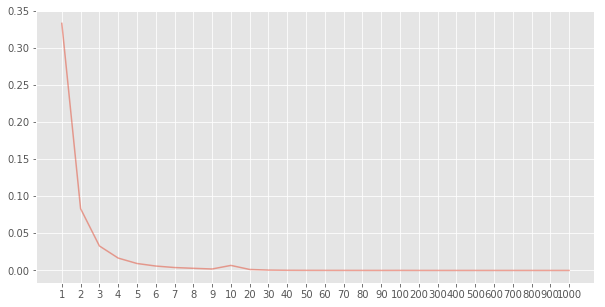

In [4]:
N = 300000
_, degree = BAmodel(N)
a = np.arange(1,10)
b = 10**np.arange(3)
xaxis = ((b[:, np.newaxis] * a).flatten())
xaxis = np.append(xaxis, [(1000)])
bins = np.append(xaxis, [(1100)])
distribution,_ = np.histogram(degree, bins=bins)
yaxis = distribution / (2*N)

l = len(xaxis)
x2 = np.arange(l)

plt.plot(x2, yaxis, alpha = 0.5)
plt.xticks(x2, xaxis)
plt.show()

From the Figure above, we can see that nodes of degree 10 are approximately 30 times less common than the nodes of degree 1. In addition, nodes of degree fewer than 5 take over around 50% of the all connections.

## Viral Market Modeling

Given a pre-existing social network, how to decide which nodes should we target to maximize the propagation? In another word, what are the chances that other individuals also being "active" given some already "active" in the network? We may apply Activity from Demographics and Links Algorithm (**AFDL**) via viral marketing.

1. Extract features of connectivity via random walk with the assumption that entites are more likely to be active if their connectivity patterns are similar to those of already-known active entites.
2. Combine with demographic features if available
3. Rank the likelihood of unlabled entities to be active with a rating classifer


# Recommender Systems

## How to Identify Worthwhile Items?

With an effective way of advertising, how to decide what item should be advertised? In old times, people tend to identify worthwhile items depending on reliable experts or experienced consumers as editorial recommendations. Gradually, people utilize database to do content-based search and filtering with matched keywords. However, with a **Recommender System**, it proactively predicts the "rating" or "preference" a user would give to an item, such as the customized sales of books from Amazon and the personalized music packages from Pandora.


## How to Recommend Items that Would Appeal to Their Potential Consumers?

One simple way is that we can show the customer the best sellers, while each person does have different opinions on what they believe to be the best. And what the sellers conclude to be the best is just the result based on statistic data, hence not suitable for all customers. Accordingly, we can predict what customers like using demographic data together with market segmentaion as well as their purchase histories to leverage similarities among customers.

### Collaborative Filtering (CF)

This is a prediction method based only on rating pattern similarity for different users or items. As it is independent of content analysis, it can give recommendations without acquiring actual cognition of the item itself.

One common approach is called **user-centric** CF. First, search for users who have the same rating patterns with the targeted user. Then, utilize the ratings given by the previously found users to give a prediction to the targetes user as they are considered to have similar minds. A specific application of user-centric collaborative filtering is **k-nearest neighbor algorithm**. 

The basic idea about this algorithm is to take the k closest training examples as input. As for the ouput, *k-NN* can be used either for classification or regression. In k-NN classification, the object is classified by the majority of votes from its neighbors. In k-NN regression, the property value is the average of the k neighbors. 

To determine which subsets are the k closest from the training examples, we need to calculate and rank the euclidean distances. Typically, there are three ways to do the calculation (N for # of samples, D for # of features):
1. Brute force with complexity of $O((DN))$ (generally used if $N < 30$ )
2. Ball tree with complexitt of $O(D\log(N))$
3. KD tree with complexitt of $O(D\log(N))$ if $D$ is small ($<20$) and $O((DN))$ if high dimensions

A simple implementation with brute force is shown as below:

In [5]:
def kNearestNeighbor(xTrain, yTrain, x, k=1):
    mat1 = np.tile(xTrain, (x.shape[0], 1))
    mat2 = np.tile(x, (1, xTrain.shape[0])).reshape(mat1.shape)
    diffmat = (mat1-mat2)**2
    dist = np.sqrt(np.sum(diffmat, axis=1)).reshape(x.shape[0], xTrain.shape[0])
    
    distances = np.sort(dist)[:, :k]
    indices = np.argsort(dist)[:, :k]
    
    return distances, indices
    
    
def knnBruteforceClassification(xTrain, yTrain, x, k=1):
    dist, ind = kNearestNeighbor(xTrain, yTrain, x, k)
    val = np.sum(yTrain[ind], axis=1)
    label = np.round(val/k).astype(int)
    
    return label


def knnBruteforceRegression(xTrain, yTrain, x, k=1):
    dist, ind = kNearestNeighbor(xTrain, yTrain, x, k)
    val = np.sum(yTrain[ind], axis=1)/k
    
    return val

In [7]:
xTrain = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
yTrain = np.array([0, 0, 1, 1])
x = np.array([[0,1], [2,3]])
distances, indices = kNearestNeighbor(xTrain, yTrain, x, 3)

(array([[ 1.        ,  2.        ,  2.23606798],
        [ 2.        ,  2.23606798,  5.        ]]), array([[2, 3, 0],
        [3, 2, 0]]))

In [8]:
knnBruteforceClassification(xTrain, yTrain, x, 3)

array([1, 1])

In [9]:
knnBruteforceRegression(xTrain, yTrain, x, 3)

array([ 0.66666667,  0.66666667])

We can also directly use libraries from *scikit-learn* to apply the $k-NN$ algorithm.

In [11]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

# To find the k nearest neighbors
nbrs = NearestNeighbors(n_neighbors=3, algorithm='kd_tree').fit(xTrain)
distances, indices = nbrs.kneighbors(x)
print(distances)
print(indices)

nbrs = KNeighborsClassifier(n_neighbors = 3).fit(xTrain, yTrain)
label2 = nbrs.predict(x)
print(label2)

nbrs = KNeighborsRegressor(n_neighbors = 3).fit(xTrain, yTrain)
value2 = nbrs.predict(x)
print(value2)

[[ 1.          2.          2.23606798]
 [ 2.          2.23606798  5.        ]]
[[2 3 0]
 [3 2 0]]
[1 1]
[ 0.66666667  0.66666667]


In the following example, we take the dataset from *scikit-learn* to see if someone has breast cancer (discrete values of 2 labels) with the first 3 features. 

['malignant' 'benign']


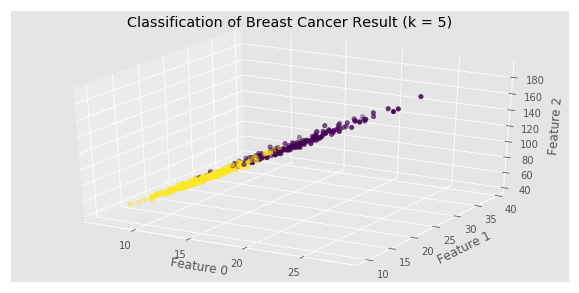

In [15]:
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

def knnClassification(xTrain, yTrain, x, k=5):
    nbrs = KNeighborsClassifier(n_neighbors = k).fit(xTrain, yTrain)
    label = nbrs.predict(x)
    return label

cancer = datasets.load_breast_cancer()
xTrain1 = cancer.data[:,:3]
yTrain1 = cancer.target
x1 = np.array([[18, 19, 130], [17, 25, 70]])
label = knnClassification(xTrain1, yTrain1, x1)
print(cancer.target_names[label])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xTrain1[:,0], xTrain1[:, 1], xTrain1[:, 2], c=yTrain1)

ax.set_xlabel('Feature 0')
ax.set_ylabel('Feature 1')
ax.set_zlabel('Feature 2')

plt.title("Classification of Breast Cancer Result (k = 5)")
plt.show()

Also, we can predict the boston house-price (continuous values) with the first 2 features of the dataset from *scikit-learn*.

[ 24.]


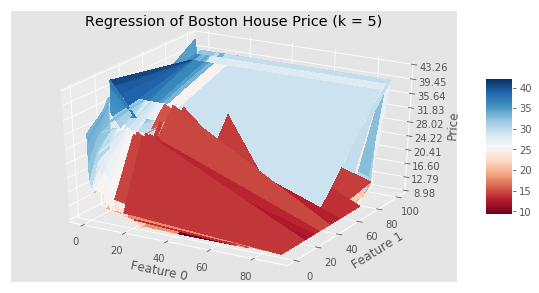

In [16]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

def knnRegression(xTrain, yTrain, x, k=5):
    nbrs = KNeighborsRegressor(n_neighbors = k).fit(xTrain, yTrain)
    value = nbrs.predict(x)
    return value

house = datasets.load_boston()
xTrain2 = house.data[:,:2]
yTrain2 = house.target
x2 = np.array([[0.02, 1.9]])
value = knnRegression(xTrain2, yTrain2, x2)
print(value)

fig = plt.figure()
ax = fig.gca(projection='3d')

X, Y = np.meshgrid(xTrain2[:,0], xTrain2[:,1])
Z = knnRegression(xTrain2, yTrain2, np.c_[X.ravel(), Y.ravel()]).reshape(X.shape)

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                       cmap=cm.RdBu,linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.set_xlabel('Feature 0')
ax.set_ylabel('Feature 1')
ax.set_zlabel('Price')

plt.title("Regression of Boston House Price (k = 5)")

plt.show()

Another apporach is **item-centric**, in which a item-item matrix is build to determine the relationships between all pairs of items (such as butter and milk), and the system then gives a prediction based on the examing the matrix and matching targeted users' data. It implies that people, like you, who rated A highly also tend to rate B highly. If you haven't rated B yet, you should try. **Slope One** is one example.

### Content-based Filtering

This filtering method is based on item features and user's profile. To extract the features, a widely used algorithm is **tf-idf** presentation. To determine the weighted vector of item features, the simple approach can be utilizing the average values of the item vector. Meanwhile, there are other approaches mentioned in previous class such as Decision trees, Baysian Classifer, and Neural Networks. 

## Hybrid Recommender Systems

Recently, it is shown that combining collaborative filterig and content-based fitering can be more effective in some cases. It can be implemented by adding up the two seprate results, or by applying content-based capabilities into collaborative method, and vice versa. For example, **Netflix** makes recommendations by CF as they compare the watching habits of similar users. Meanwhile, it also recommend sfilms similar to movies the user once rated highly with content-based filterng.

## More Challenges

Both collaborative filtering and content-based filtering have the **cold-start** problem. As for new users, CF cannot analyze pattern similarities as they have no history to draw from. However, if some **demographic-based** data are known, it is possible to give predictions at least initially. Or, we can combine user-centric as well as item-centric together in the prediction algorithm. As for new items, one possible way to figure it out might be analyzing feedback to random showing initially or its correlationship with already known items.
